# Create all datasets

## Swap rate (sum_df and od_raw)

In [6]:
import importlib
import volpy_func_lib as vp
import load_clean_lib
import table_lib
import vol_strat_lib as vs
import option_returns as orpy
from global_settings import *

importlib.reload(vp)
importlib.reload(load_clean_lib)
importlib.reload(table_lib)
importlib.reload(vs)
importlib.reload(orpy)

<module 'option_returns' from 'D:\\Professionelt\\Code\\volpy\\option_returns.py'>

In [2]:
IV_type = "om" # om, bid, ask

In [3]:
ticker_list = None #["SPX", "OEX"]
om_folder = "i2s1_full_v2" #i4s4_CW, SPX_short, SPX_full, i2s1_full_v2

sum_df, od_raw = vp.load_analyze_create_swap(
    om_folder=om_folder, 
    ticker_list=ticker_list, 
    IV_type=IV_type, 
    save_files = True,
    safe_slow_IV = False
)

t_ was selected in global_settings.py
Data loaded


Processing Groups: 100%|██████████| 40730/40730 [00:22<00:00, 1773.56it/s]


## Variance Strategies

In [7]:
# om_folder = "i2s1_full_v2" #SPX_full, i2s1_full_v2
# sum_df, od_raw = vs.import_sum_raw(om_folder = om_folder)

In [10]:
price_type = "mid" # option price for the option strategies
OTMs = [0.05, 0.15]

sum_df_big, df_orpy = vs.create_option_sgys(
    sum_df, 
    od_raw, 
    price_type=price_type, 
    IV_type=IV_type, 
    OTMs=OTMs, 
    om_folder = om_folder,
    save_files=True
)

# VIX

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
df = vp.make_df_strats(df_orpy, sgy_common = "r_D_30_", sign=False, scale = False, plot = False, ticker_list=["SPX"], extra_columns = ["SW_0_30"]) #, sgy_names = None

In [60]:
df = df[df["VIX"].isna()==False]
# df = df[df["date"] < pd.Timestamp("2003-02-28")]

In [63]:
np.corrcoef(df["SW_0_30"], df["VIX"]**2)

array([[1.        , 0.99663457],
       [0.99663457, 1.        ]])

In [64]:
df["SW_0_30"].mean()

0.04654720375996793

In [65]:
(df["VIX"]**2).mean()

0.04852982216573315

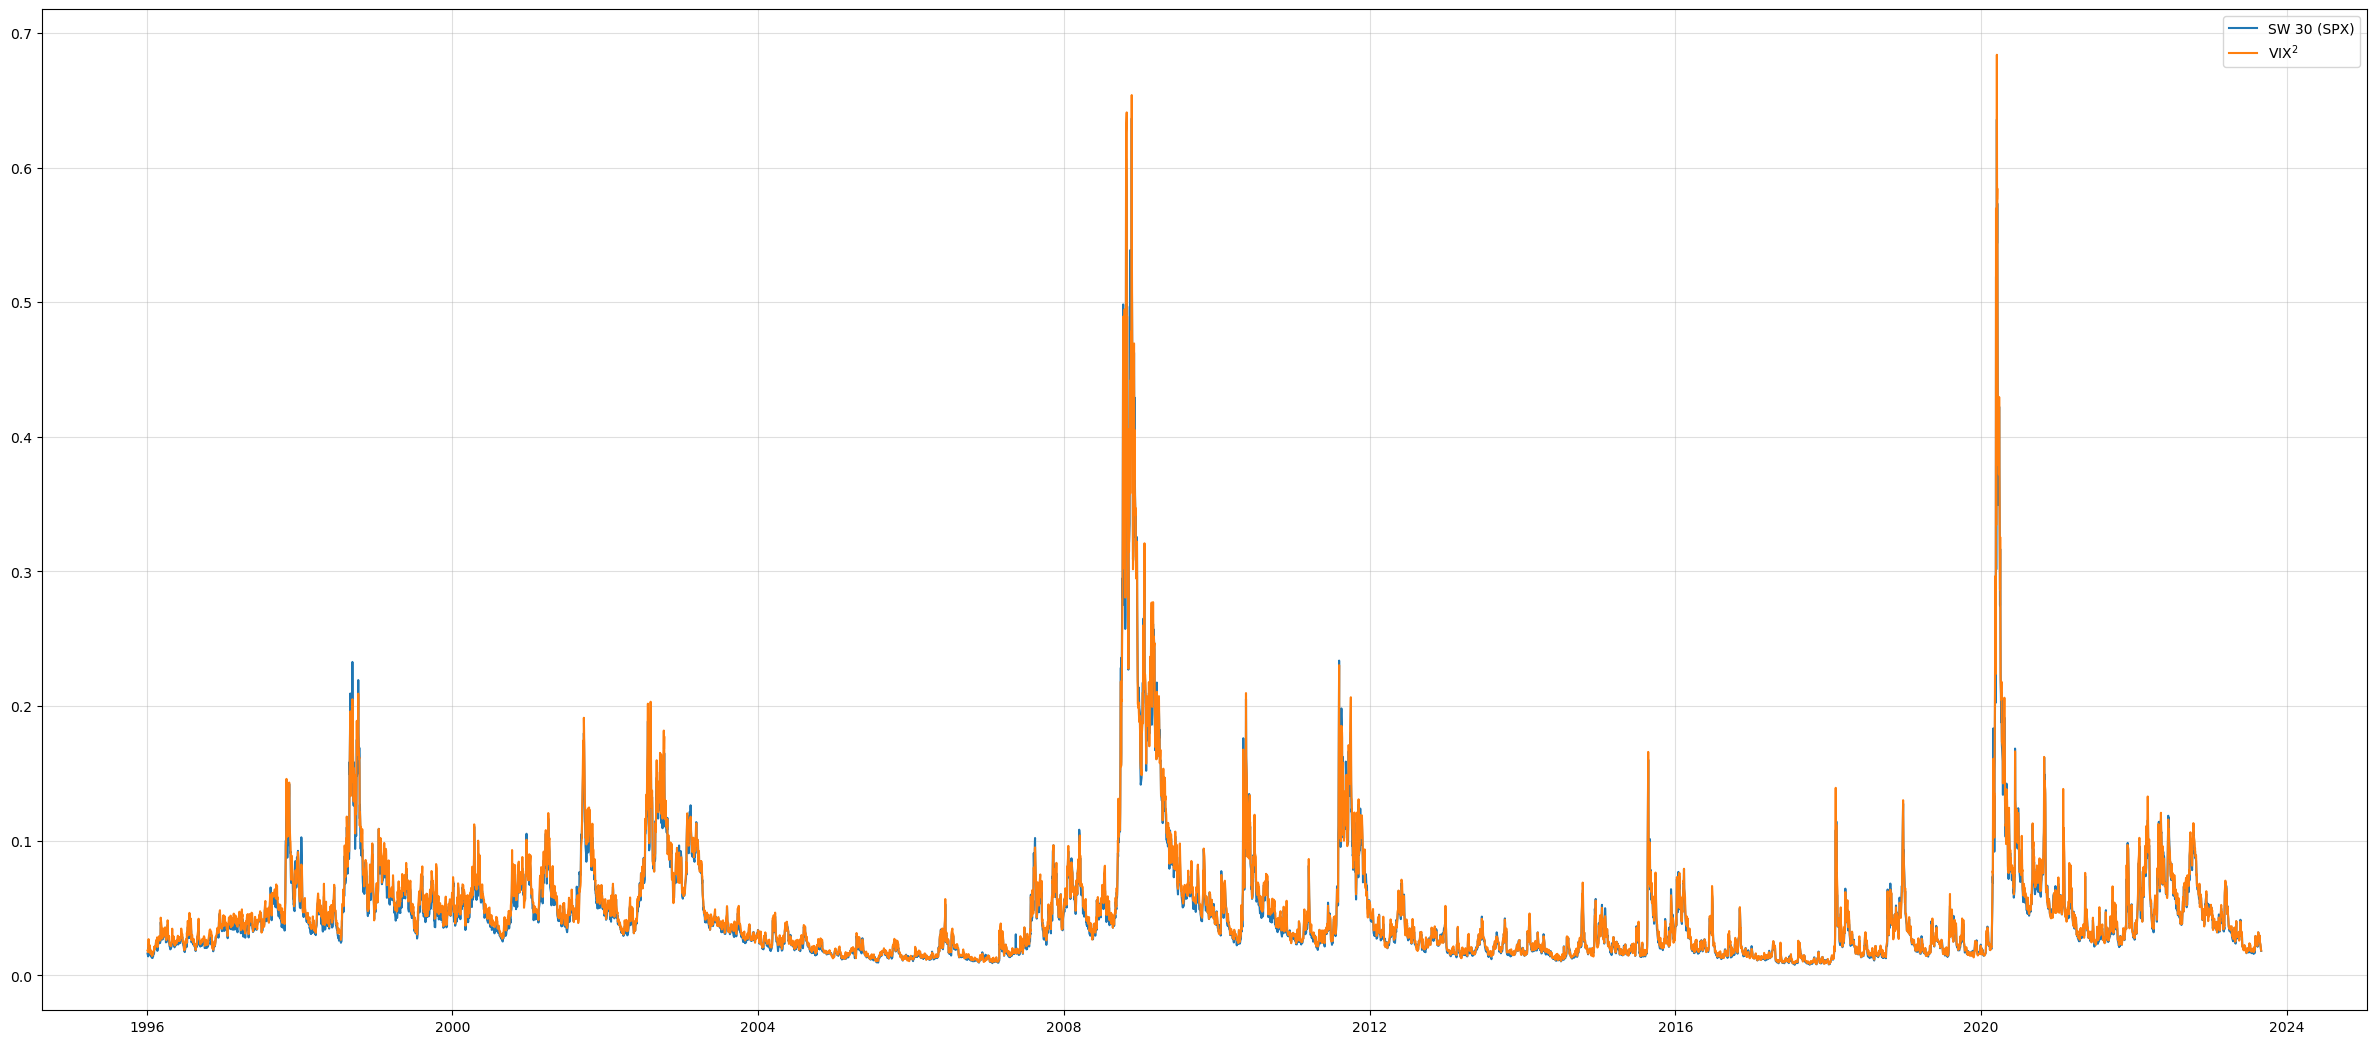

In [69]:
plt.figure(figsize=(30,13))
plt.plot(df["date"], df["SW_0_30"], label = "SW 30 (SPX)", alpha = 1)
plt.plot(df["date"], df["VIX"]**2, label = r"VIX$^2$", alpha = 1)
plt.legend()
plt.grid(alpha=0.4)
plt.show()

# Summary visualizations

In [60]:
importlib.reload(vp)
importlib.reload(load_clean_lib)
importlib.reload(table_lib)
importlib.reload(vs)
importlib.reload(orpy)

<module 'option_returns' from 'D:\\Professionelt\\Code\\volpy\\option_returns.py'>

In [3]:
import pandas as pd

In [4]:
profile = "Mads"
om_folder = "i2s1_full_v2"
input_dir = load_clean_lib.volpy_output_dir(om_folder)
time_type = days_type()

sum_df = pd.read_csv(f"{input_dir}/{time_type}summary_dly.csv")
sum_df["date"] = pd.to_datetime(sum_df["date"])
sum_df.set_index('date', inplace=True)

In [20]:
df = sum_df[sum_df["ticker"] == "SPX"]

D:\Professionelt\Code\volpy\volpy_func_lib.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'high {var}'] = np.where(df[f'low {var}'] == 21, 21, df[f'high {var}']) # technically should depend on if c_ or t_ days


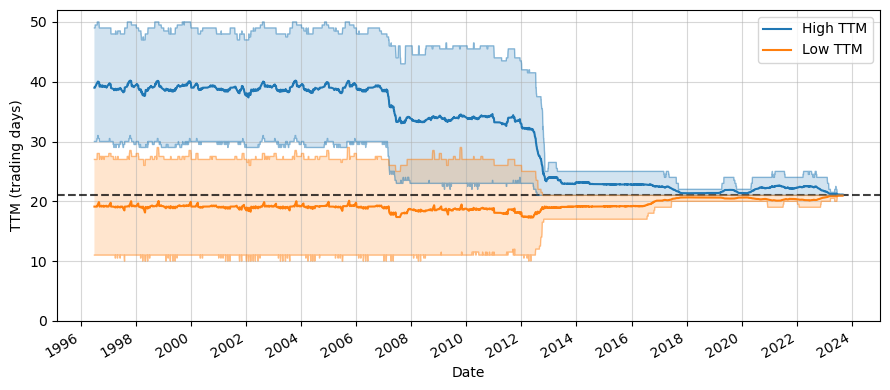

In [21]:
vp.plot_timeseries_with_pct(df, alpha = 0.1, var = "days", var_name = "TTM (trading days)", figsize = (9,4), savefig=True)

D:\Professionelt\Code\volpy\volpy_func_lib.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'high {var}'] = np.where(df[f'low {var}'] == 21, 21, df[f'high {var}']) # technically should depend on if c_ or t_ days


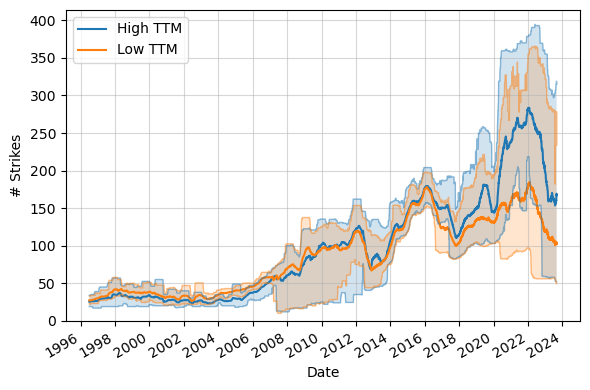

In [22]:
vp.plot_timeseries_with_pct(df, alpha = 0.1, var = "#K", var_name = "# Strikes", figsize = (6,4), savefig=True)

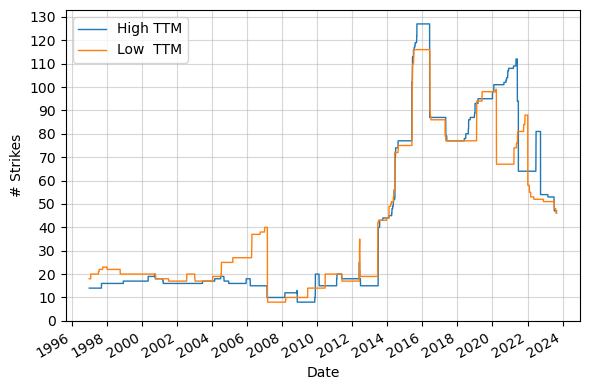

In [23]:
vp.plot_lowest_number_of_strikes_timeseries(df, figsize = (6,4), savefig=True)

# Summary tables